In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 16 12:54:46 2019

@author: mor
"""

import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas


In [2]:

pd.set_option('display.max_columns', 10)


In [3]:

# Import the Point geometry
from shapely.geometry import Point

# Construct a point object for the Eiffel Tower
eiffel_tower = Point([255422.6,6250868.9])

# Print the result
print(eiffel_tower)



POINT (255422.6 6250868.9)


In [4]:


districts_france= geopandas.read_file('data/quartier_paris.geojson')
districts_france= districts_france.to_crs(epsg = 3857)

districts=geopandas.read_file('data/paris_districts.gpkg')
districts=districts.drop('geometry',axis=1).merge(districts_france,left_on='id',right_on='c_qu')
districts=districts[['id', 'district_n', 'population','geometry']]
districts.columns=['id', 'district_name', 'population', 'geometry']

restaurants = geopandas.read_file("data/paris_restaurants.geojson")


In [5]:

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto))



False
True
4431.459825586486


In [6]:


# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(districts[mask])




0    False
1    False
2    False
3    False
4    False
dtype: bool
    id district_name  population  \
27  28  Gros-Caillou       25156   

                                             geometry  
27  POLYGON ((257097.2898896902 6250116.967139574,...  


460.69760282781715


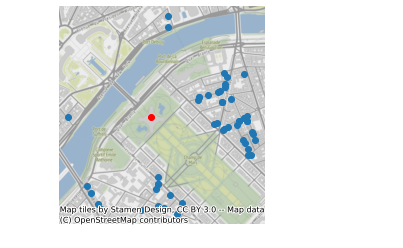

In [7]:

import contextily
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km
restaurants_eiffel = restaurants[dist_eiffel<1000]

# Make a plot of the close-by restaurants
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()



In [8]:

districts.crs = {'init' :'epsg:3857'}
stations = geopandas.read_file('data/paris_sharing_bike_stations_utm.geojson')
stations = stations.to_crs({'init': 'epsg:3857'})



In [9]:

# Join the districts and stations datasets
joined = geopandas.sjoin(stations,districts,op="within")

# Inspect the first five rows of the result
print(joined.head())



                                       name  bike_stands  available_bikes  \
0                    14002 - RASPAIL QUINET           44                4   
143  14112 - FAUBOURG SAINT JACQUES CASSINI           16                0   
293               14033 - DAGUERRE GASSENDI           38                1   
346     14006 - SAINT JACQUES TOMBE ISSOIRE           22                0   
429       14111 - DENFERT-ROCHEREAU CASSINI           24                8   

                                        geometry  index_right  id  \
0     POINT (259324.8871962914 6247620.77104855)           52  53   
143  POINT (260262.7811538963 6247057.329983589)           52  53   
293  POINT (259184.1487292577 6247025.657332335)           52  53   
346  POINT (260146.2351317476 6246604.533274964)           52  53   
429  POINT (260040.4414536479 6247341.726191025)           52  53   

    district_name  population  
0    Montparnasse       18570  
143  Montparnasse       18570  
293  Montparnasse       18

In [10]:


# Read the trees and districts data
trees = geopandas.read_file("data/paris_trees_small.gpkg")
districts = geopandas.read_file("data/paris_districts_utm.geojson")

# Spatial join of the trees and districts datasets
joined = geopandas.sjoin(trees, districts, op='within')

# Calculate the number of trees in each district
trees_by_district = joined.groupby('district_name').size()

# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

# Inspect the result
print(trees_by_district.head())



                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392


In [11]:


# Print the first rows of the result of the previous exercise
print(trees_by_district.head())

# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts,trees_by_district,on='district_name')

# Inspect the result
print(districts_trees.head())



                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  
0  POLYGON ((451922.1333912524 5411438.484355546,...       40  
1  POLYGON ((452278.4194036503 5412160.89282334, ...       40  
2  POLYGON ((451553.8057660239 5412340.522224233,...        4  
3  POLYGON ((451004.907944323 5412654.094913081, ...        7  
4  POLYGON ((451328.7522686935 5412991.278156867,...        7  


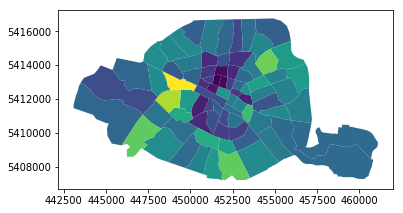

In [12]:



# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees_by_district, on='district_name')

# Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area

# Make of map of the districts colored by 'n_trees_per_area'
districts_trees.plot(column='n_trees_per_area')
plt.show()



In [13]:

districts_trees['n_trees_per_area']=districts_trees['n_trees_per_area']*10000



   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  \
0  POLYGON ((451922.1333912524 5411438.484355546,...       40   
1  POLYGON ((452278.4194036503 5412160.89282334, ...       40   
2  POLYGON ((451553.8057660239 5412340.522224233,...        4   
3  POLYGON ((451004.907944323 5412654.094913081, ...        7   
4  POLYGON ((451328.7522686935 5412991.278156867,...        7   

   n_trees_per_area  
0          0.460544  
1          0.970315  
2          0.146226  
3          0.259922  
4          0.372519  


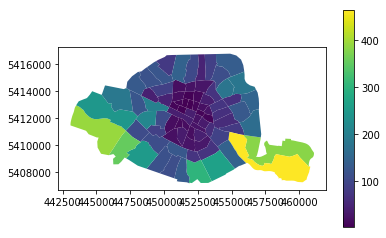

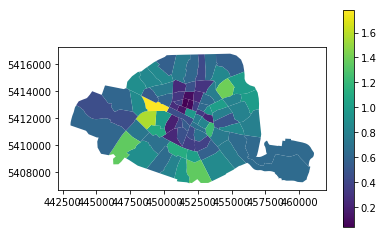

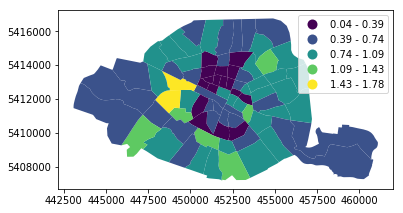

In [14]:

# Print the first rows of the tree density dataset
print(districts_trees.head())

# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees', legend=True)
plt.show()

# Make a choropleth of the number of trees per area
districts_trees.plot(column='n_trees_per_area', legend=True)
plt.show()

# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', legend=True)
plt.show()



C:\Users\mor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


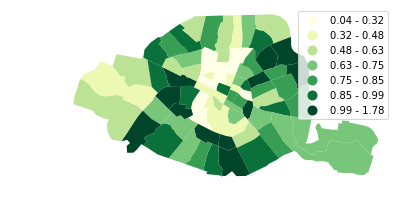

In [15]:


# Generate the choropleth and store the axis
ax = districts_trees.plot(column='n_trees_per_area', scheme='quantiles',
                          k=7, cmap='YlGn', legend=True)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()



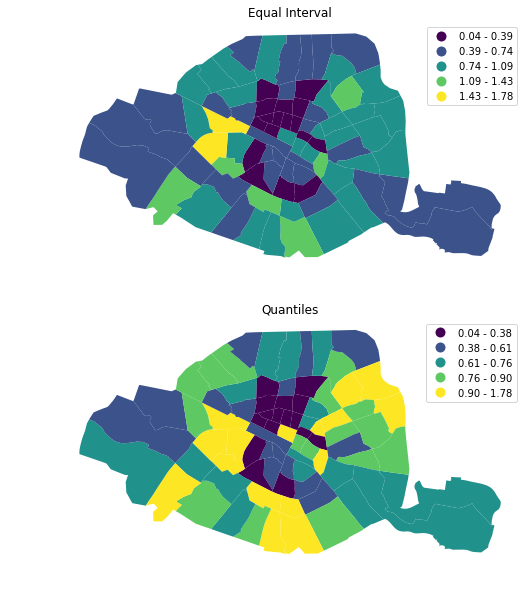

In [16]:


# Set up figure and subplots
fig, axes = plt.subplots(nrows=2,figsize=(10,10))

# Plot equal interval map
districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', k=5, legend=True, ax=axes[0])
axes[0].set_title('Equal Interval')
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column='n_trees_per_area', scheme='quantiles', k=5, legend=True, ax=axes[1])
axes[1].set_title('Quantiles')
axes[1].set_axis_off()

# Display maps
plt.show()

